In [6]:
import pandas as pd

In [7]:
FASHION_DATASET_HOME = '/mnt/e/jhona/Documents/Estudo/AI Microsfot & Simplon.co/Projet_chef_doeuvre/fashion_dataset/fashion-dataset/'
dataset_file = 'styles.csv'

In [8]:
ds = pd.read_csv(FASHION_DATASET_HOME + dataset_file, on_bad_lines='skip')

In [9]:
ds

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [11]:
import open_clip
import torch

# Load the Marqo/marqo-fashionCLIP model and preprocessors
model, preprocess_train, preprocess_val = open_clip.create_model_and_transforms('hf-hub:Marqo/marqo-fashionSigLIP')
tokenizer = open_clip.get_tokenizer('hf-hub:Marqo/marqo-fashionSigLIP')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CustomTextCLIP(
  (visual): TimmModel(
    (trunk): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=768, out_features=768, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=768

In [12]:
IMAGE_DATASET_HOME = '/mnt/e/jhona/Documents/Estudo/AI Microsfot & Simplon.co/Projet_chef_doeuvre/clothing_dataset/images_original'

In [94]:
ds

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [101]:
df_filtred = ds.query("(masterCategory == 'Apparel' or masterCategory == 'Accessories' or masterCategory == 'Footwear')")
categories = df_filtred.groupby(['subCategory'])['masterCategory'].apply(lambda x: list(set(x))).reset_index()
print(categories)

     subCategory masterCategory
0    Accessories  [Accessories]
1    Apparel Set      [Apparel]
2           Bags  [Accessories]
3          Belts  [Accessories]
4     Bottomwear      [Apparel]
..           ...            ...
25       Topwear      [Apparel]
26     Umbrellas  [Accessories]
27       Wallets  [Accessories]
28       Watches  [Accessories]
29  Water Bottle  [Accessories]

[30 rows x 2 columns]


In [96]:
distinct_subcategories = list(set(ds['usage'].dropna()))
print(distinct_subcategories)

['Home', 'Travel', 'Casual', 'Formal', 'Ethnic', 'Smart Casual', 'Sports', 'Party']


In [95]:
distinct_subcategories = list(set(ds.query("(masterCategory == 'Apparel' or masterCategory == 'Accessories' or masterCategory == 'Footwear')")['masterCategory']))
print(distinct_subcategories)

['Footwear', 'Apparel', 'Accessories']


In [86]:
ds_filtred = ds.query("(masterCategory == 'Apparel' or masterCategory == 'Accessories' or masterCategory == 'Footwear')")

In [88]:
list(set(ds_filtred['subCategory']))

['Jewellery',
 'Watches',
 'Mufflers',
 'Innerwear',
 'Shoe Accessories',
 'Gloves',
 'Socks',
 'Flip Flops',
 'Bottomwear',
 'Cufflinks',
 'Stoles',
 'Scarves',
 'Accessories',
 'Loungewear and Nightwear',
 'Shoes',
 'Sandal',
 'Sports Accessories',
 'Eyewear',
 'Dress',
 'Topwear',
 'Ties',
 'Perfumes',
 'Headwear',
 'Water Bottle',
 'Belts',
 'Bags',
 'Apparel Set',
 'Saree',
 'Wallets',
 'Umbrellas']

In [89]:
pd.set_option('display.max_rows', None)
print(ds_filtred.groupby(['articleType'])['subCategory'].apply(lambda x: list(set(x))).reset_index())
pd.set_option('display.max_rows',10)

               articleType                             subCategory
0       Accessory Gift Set                           [Accessories]
1               Baby Dolls              [Loungewear and Nightwear]
2                Backpacks                                  [Bags]
3                   Bangle                             [Jewellery]
4                Bath Robe              [Loungewear and Nightwear]
5                    Belts                        [Belts, Topwear]
6                  Blazers                               [Topwear]
7                  Booties                                 [Socks]
8                   Boxers                             [Innerwear]
9                      Bra                             [Innerwear]
10                Bracelet                             [Jewellery]
11                  Briefs                             [Innerwear]
12               Camisoles                             [Innerwear]
13                  Capris                            [Bottomw

In [77]:
ds_filtred.groupby(['articleType'])['subCategory'].apply(lambda x: list(set(x))).reset_index().to_numpy()

array([['Accessory Gift Set', list(['Accessories'])],
       ['Baby Dolls', list(['Loungewear and Nightwear'])],
       ['Backpacks', list(['Bags'])],
       ['Bangle', list(['Jewellery'])],
       ['Bath Robe', list(['Loungewear and Nightwear'])],
       ['Belts', list(['Belts', 'Topwear'])],
       ['Blazers', list(['Topwear'])],
       ['Booties', list(['Socks'])],
       ['Boxers', list(['Innerwear'])],
       ['Bra', list(['Innerwear'])],
       ['Bracelet', list(['Jewellery'])],
       ['Briefs', list(['Innerwear'])],
       ['Camisoles', list(['Innerwear'])],
       ['Capris', list(['Bottomwear'])],
       ['Caps', list(['Headwear'])],
       ['Casual Shoes', list(['Shoes'])],
       ['Churidar', list(['Bottomwear'])],
       ['Clothing Set', list(['Apparel Set'])],
       ['Clutches', list(['Bags'])],
       ['Cufflinks', list(['Cufflinks'])],
       ['Dresses', list(['Dress', 'Topwear'])],
       ['Duffel Bag', list(['Bags'])],
       ['Dupatta', list(['Topwear'])],
       ['E

In [ ]:
import psycopg2

# Conectar ao banco de dados PostgreSQL
conn = psycopg2.connect(
    dbname="db_dressing_virtuel", 
    user="pgdbsu", 
    password="pg#p@ssw0rd", 
    host="localhost",  # ou o IP do servidor
    port="5432"        # porta padrão do PostgreSQL
)

In [73]:
[example for example in ds]

['id',
 'gender',
 'masterCategory',
 'subCategory',
 'articleType',
 'baseColour',
 'season',
 'year',
 'usage',
 'productDisplayName']

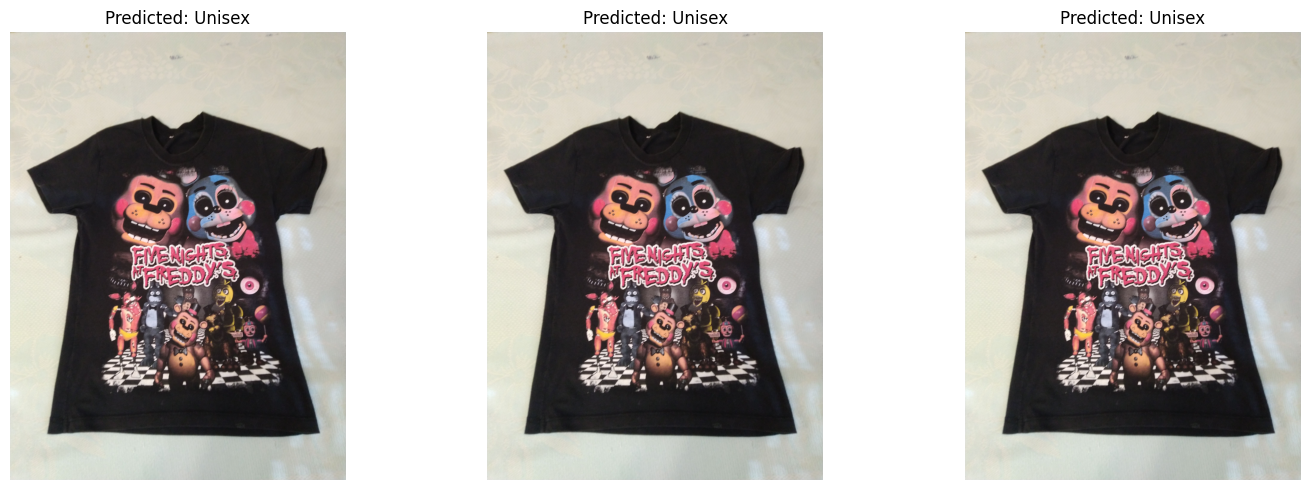

In [35]:
import matplotlib.pyplot as plt
from PIL import Image  # Import Image from PIL


# Select indices for three example images
indices = [1, 17, 23]

# Get the list of possible subcategories from the dataset
#subcategories = list(set(ds['subCategory']))
subcategories = list(set(ds['gender']))

# Preprocess the text descriptions for each subcategory using the tokenizer
text_inputs = tokenizer([f"a photo of {c}" for c in subcategories]).to(device)

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

image = IMAGE_DATASET_HOME + '/' + '0b55a8e8-0087-4c19-8729-b872718ff5ae.jpg'

image = Image.open(image)

# Loop through the indices and process each image
for i, idx in enumerate(indices):
    # Select an example image from the dataset
    # example = ds[idx]
    # image = example['image']
    # subcategory = example['subCategory']

    # Preprocess the image
    image_input = preprocess_val(image).unsqueeze(0).to(device)

    # Calculate image and text features
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_inputs)

    # Normalize the features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Calculate similarity between image and text features
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    values, indices = similarity[0].topk(1)

    # Display the image in the subplot
    axes[i].imshow(image)
    axes[i].set_title(f"Predicted: {subcategories[indices[0]]}")
    axes[i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import torch

print(torch.__version__)

2.4.0+cu121
